In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz
import csv
import time

%matplotlib inline

In [2]:
def intvals(z,var):
    delz=z[1:]-z[0:-1]
    varint=np.sum(0.5*(var[1:,:]+var[0:-1,:])*np.tile(delz,(np.shape(var)[1],1)).T,0)
    return(varint)

In [3]:
filename='/data/eolson/SOG/SOG-runs/run_5yrBase/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dt.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

mtimes=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    mtimes.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
        

In [4]:
z=da[:,0,0];
DiatBase=da[:,4,:] # umol N / m^2
MyriBase=da[:,5,:] # umol N / m^2
NanoBase=da[:,6,:] # umol N / m^2
MicZBase=da[:,7,:] # umol N / m^2
nitrateBase=da[:,8,:] # umol N / m^2
ammBase=da[:,9,:] # umol N / m^2
SiBase=da[:,10,:] # umol Si / m^2
print(DiatBase.shape)

(82, 1379)


In [5]:
filename='/data/eolson/SOG/SOG-runs/run_NRetDiatoms/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dt.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

mtimes2=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    mtimes2.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0];
DiatOff=da[:,4,:] # umol N / m^2
MyriOff=da[:,5,:] # umol N / m^2
NanoOff=da[:,6,:] # umol N / m^2
MicZOff=da[:,7,:] # umol N / m^2
nitrateOff=da[:,8,:] # umol N / m^2
ammOff=da[:,9,:] # umol N / m^2
SiOff=da[:,10,:] # umol Si / m^2
print(field_names)

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


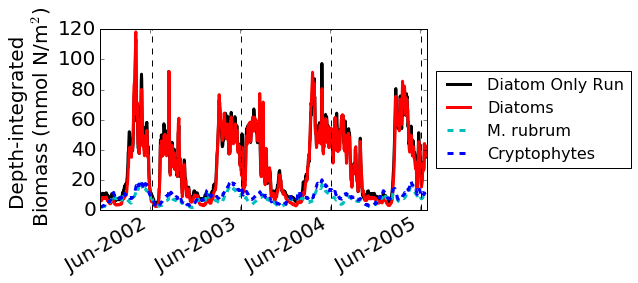

In [6]:
fig, axs = plt.subplots(1,1,figsize=(9,4.5))
pl0=axs.plot(mtimes[50:],intvals(z,DiatOff[:,50:]),'k-',lw=3, label='Diatom Only Run')
pl0=axs.plot(mtimes[50:],intvals(z,DiatBase[:,50:]),color='r',lw=3, label='Diatoms')
pl0=axs.plot(mtimes[50:],intvals(z,MyriBase[:,50:]),'c--',lw=3, label='M. rubrum')
pl0=axs.plot(mtimes[50:],intvals(z,NanoBase[:,50:]),'b--',lw=3,label='Cryptophytes')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
axs.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,120),'k--')
axs.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,120),'k--')
axs.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,120),'k--')
axs.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,120),'k--')
my=dts.DateFormatter('%b-%Y')
axs.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
axs.set_ylabel('Depth-integrated\n Biomass (mmol N/m$^2$)', fontsize=20)
pos1 = axs.get_position() # get the original position 
pos2 = [pos1.x0+.05*pos1.width, pos1.y0+pos1.height*.1,  pos1.width*.65, pos1.height*.8] 
axs.set_position(pos2) # set a new position
plt.legend(fontsize=16,loc=5,bbox_to_anchor=(1.65, 0.5))#, borderaxespad=0.
fig.savefig('/home/eolson/pyCode/notebooks/figs/compDiatFullIntegrated.png')

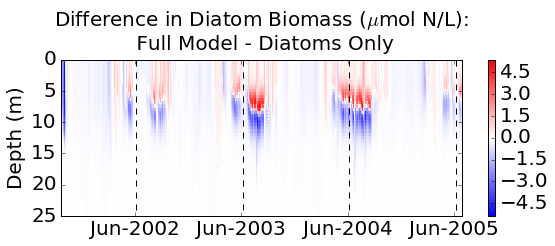

In [7]:
plt.figure(num=None, figsize=(9, 3.5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,DiatBase-DiatOff,cmap='bwr',
                    vmin=-np.max(np.abs(DiatBase-DiatOff)), vmax=np.max(np.abs(DiatBase-DiatOff)))
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
cb=plt.colorbar(mesh0)
ax.set_ylabel('Depth (m)', fontsize=20)
ax.set_title('Difference in Diatom Biomass ($\mu$mol N/L):\n Full Model - Diatoms Only',size=20,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
cb.ax.tick_params(labelsize=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
axs.set_ylabel('Depth-integrated\n Biomass (mmol N/m$^2$)', fontsize=20)
plt.savefig('/home/eolson/pyCode/notebooks/figs/compDiatFullHoff.png')

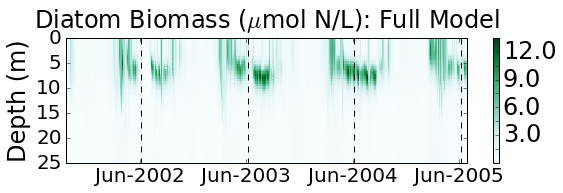

In [34]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,DiatBase,cmap='BuGn')
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
ax.set_ylabel('Depth (m)', fontsize=24)
ax.set_title('Diatom Biomass ($\mu$mol N/L): Full Model',size=24,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
cb=plt.colorbar(mesh0)
cb.ax.tick_params(labelsize=24)
for label in cb.ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/diatomFull.png')

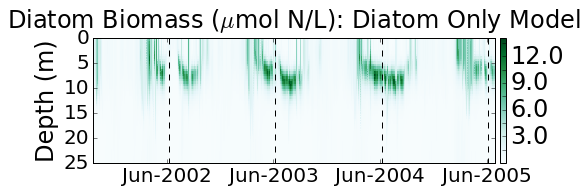

In [35]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,DiatOff,cmap='BuGn')
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
ax.set_ylabel('Depth (m)', fontsize=24)
ax.set_title('Diatom Biomass ($\mu$mol N/L): Diatom Only Model',size=24,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
cb=plt.colorbar(mesh0)
cb.ax.tick_params(labelsize=24)
for label in cb.ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0+.05*pos1.width, pos1.y0,  pos1.width, pos1.height*.8] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/diatomOnly.png')

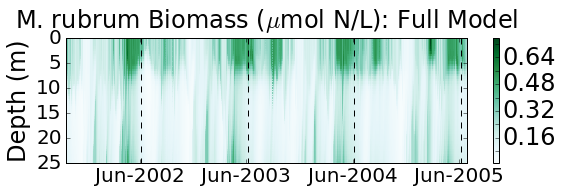

In [38]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,MyriBase,cmap='BuGn')
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
ax.set_ylabel('Depth (m)', fontsize=24)
ax.set_title('M. rubrum Biomass ($\mu$mol N/L): Full Model',size=24,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
cb=plt.colorbar(mesh0)
cb.ax.tick_params(labelsize=24)
for label in cb.ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/MRubFull.png')

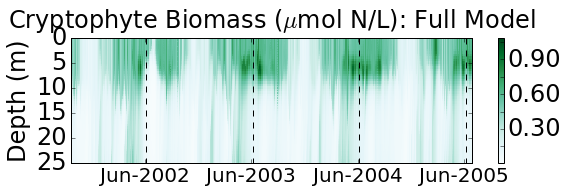

In [37]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,NanoBase,cmap='BuGn')
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
ax.set_ylabel('Depth (m)', fontsize=24)
ax.set_title('Cryptophyte Biomass ($\mu$mol N/L): Full Model',size=24,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=24)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
cb=plt.colorbar(mesh0)
cb.ax.tick_params(labelsize=24)
for label in cb.ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0,  pos1.width, pos1.height*.8] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/nanoFull.png')

In [12]:
print(mtimes[994])

2004-06-10 12:00:00+00:00
